In [ ]:
1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。

3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

5.使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。

6.使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。

7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [6]:
#1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

import pandas as pd

data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\github_bot_processed_data.csv')

# 设置 pandas 显示选项
pd.set_option('display.max_rows', 20) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

# 查看数据的前10行
print(data.head(10))


   label  type  site_admin  company   blog  location  hireable                                                                                                  bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                                                                  NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True                                        I just press the buttons randomly, and the program evolves...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True                                                           Time is unimportant,\nonly 

In [9]:
#2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 
#使用describe()方法生成数据的描述性统计信息

import pandas as pd

data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\github_bot_processed_data.csv')

# 使用 head() 查看前五行数据
print("前五行数据：")
print(data.head())

# 使用 info() 查看每列的数据类型
print("\n数据类型：")
print(data.info())

# 使用 describe() 生成数据的描述性统计信息
print("\n描述性统计信息：")
print(data.describe())


前五行数据：
   label  type  site_admin  company   blog  location  hireable                                                            bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                            NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the program evolves...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True                     Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0
3    Bot 

In [19]:
#3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

import pandas as pd

data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\github_bot_processed_data.csv')

# 日期
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
data['created_at'] = data['created_at'].dt.strftime('%Y-%m-%d')
data['updated_at'] = data['updated_at'].dt.strftime('%Y-%m-%d')

# 布尔值
data['site_admin'] = data['site_admin'].map({True: 'Yes', False: 'No'})
data['hireable'] = data['hireable'].map({True: 'Yes', False: 'No'})

# 处理文本字段
data['bio'] = data['bio'].fillna('No bio available')

print(data)

output_path = r'C:\Users\光影PRO\Desktop\DaSE\导论\Homework 8第三题结果.csv'

# 保存
data.to_csv(output_path, index=False, encoding='utf-8-sig')



       label  type site_admin  company   blog  location hireable                                                                                                  bio  public_repos  public_gists  followers  following  created_at  updated_at  text_bot_count
0      Human  True         No    False  False     False       No                                                                                     No bio available            26             1          5          1  2011-09-26  2023-10-13               0
1      Human  True         No    False   True     False      Yes                                        I just press the buttons randomly, and the program evolves...            30             3          9          6  2015-06-29  2023-10-07               0
2      Human  True         No     True   True      True      Yes                                                           Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29  202

In [22]:
#4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\Homework 8第三题结果.csv')

columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']

for column in columns_to_transform:
    data[column] = np.log1p(data[column]) 

print(data[columns_to_transform].head())


   public_repos  public_gists  followers  following
0      3.295837      0.693147   1.791759   0.693147
1      3.433987      1.386294   2.302585   1.945910
2      4.644391      3.912023   7.100852   5.402677
3      3.912023      0.000000   4.442651   1.098612
4      2.484907      0.693147   1.945910   1.098612


In [ ]:
5.使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。

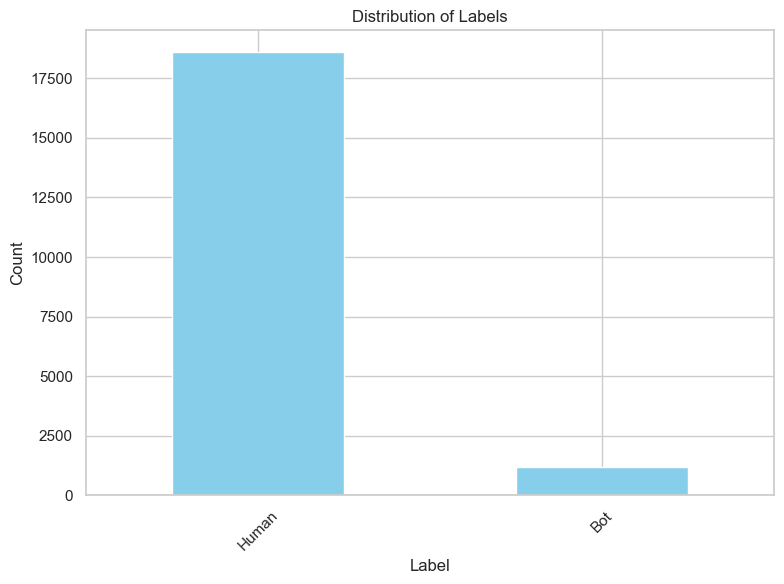

<Figure size 1000x600 with 0 Axes>

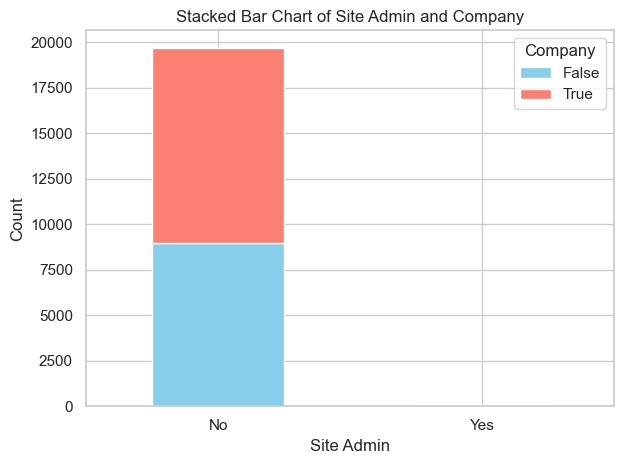

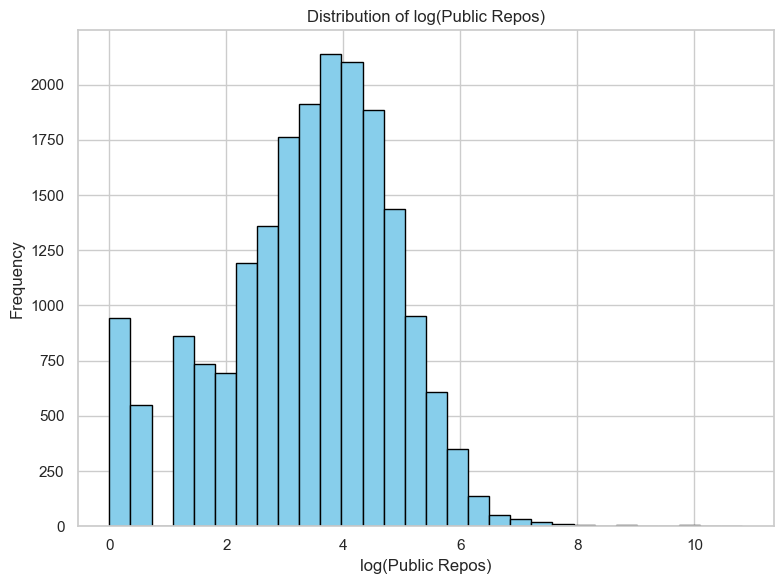

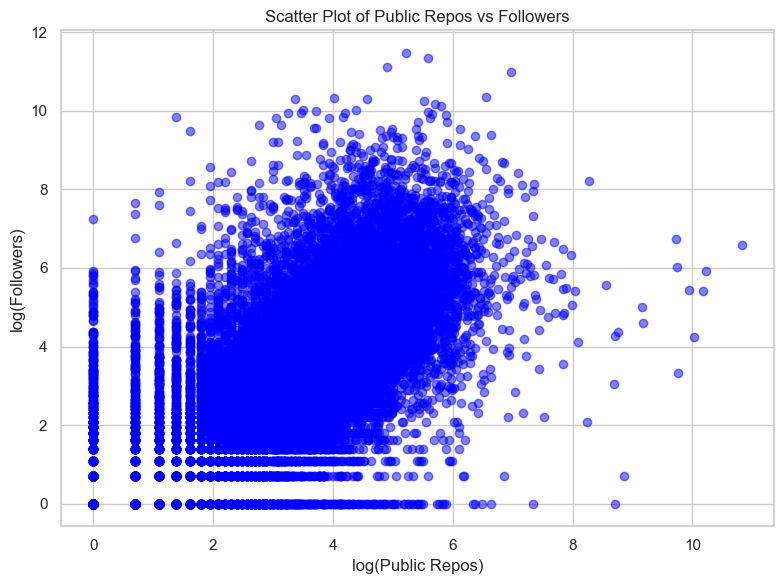

D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

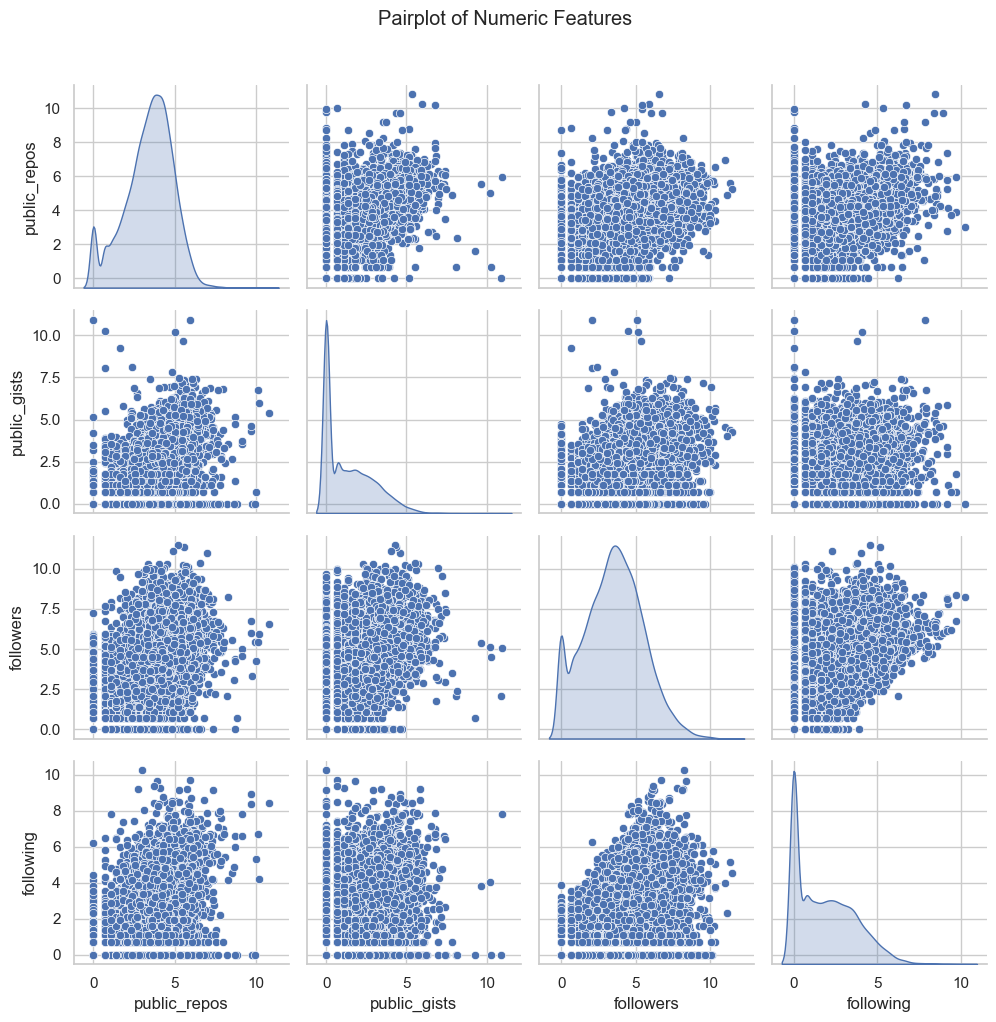

In [32]:
#在3 4题的基础上进行
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\Homework 8第三题结果.csv')
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# 对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for column in columns_to_transform:
    data[column] = np.log1p(data[column])

sns.set(style="whitegrid")

# 1. 绘制条形图：展示label列的类别分布
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 绘制堆积柱状图：展示多个布尔特征（如 'site_admin', 'company' 等）的分布
plt.figure(figsize=(10, 6))
bool_columns = ['site_admin', 'company']
ct = pd.crosstab(index=data['site_admin'], columns=data['company'], rownames=['Site Admin'], colnames=['Company'])

ct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Stacked Bar Chart of Site Admin and Company')
plt.xlabel('Site Admin')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. 绘制直方图：展示 log_public_repos 的对数变换后的数据分布
plt.figure(figsize=(8, 6))
plt.hist(data['public_repos'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of log(Public Repos)')
plt.xlabel('log(Public Repos)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. 绘制散点图：展示 public_repos 与 followers 之间的关系
plt.figure(figsize=(8, 6))
plt.scatter(data['public_repos'], data['followers'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Public Repos vs Followers')
plt.xlabel('log(Public Repos)')
plt.ylabel('log(Followers)')
plt.tight_layout()
plt.show()

# 5. 绘制散点矩阵：展示多个数值型特征之间的成对关系
numeric_columns = ['public_repos', 'public_gists', 'followers', 'following']
sns.pairplot(data[numeric_columns], diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
6.使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\Homework 8第三题结果.csv')
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# 对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for column in columns_to_transform:
    data[column] = np.log1p(data[column])

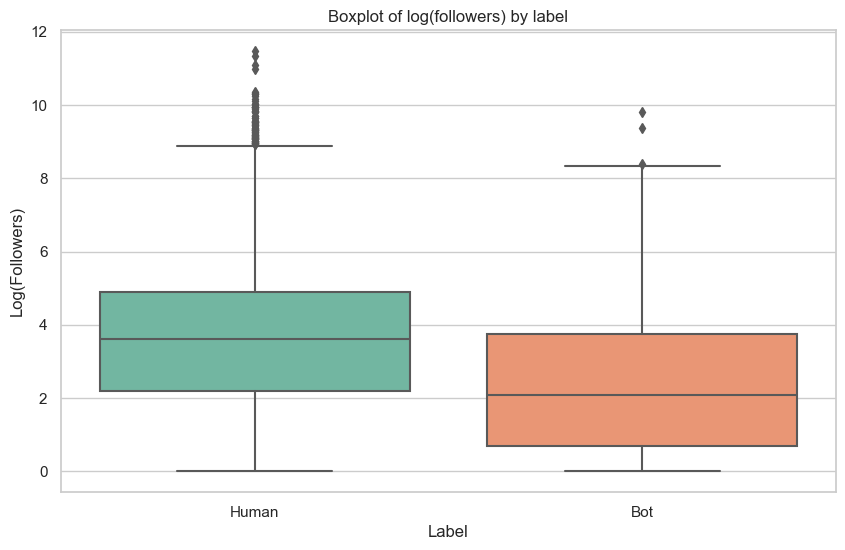

D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\jupyter notebook\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

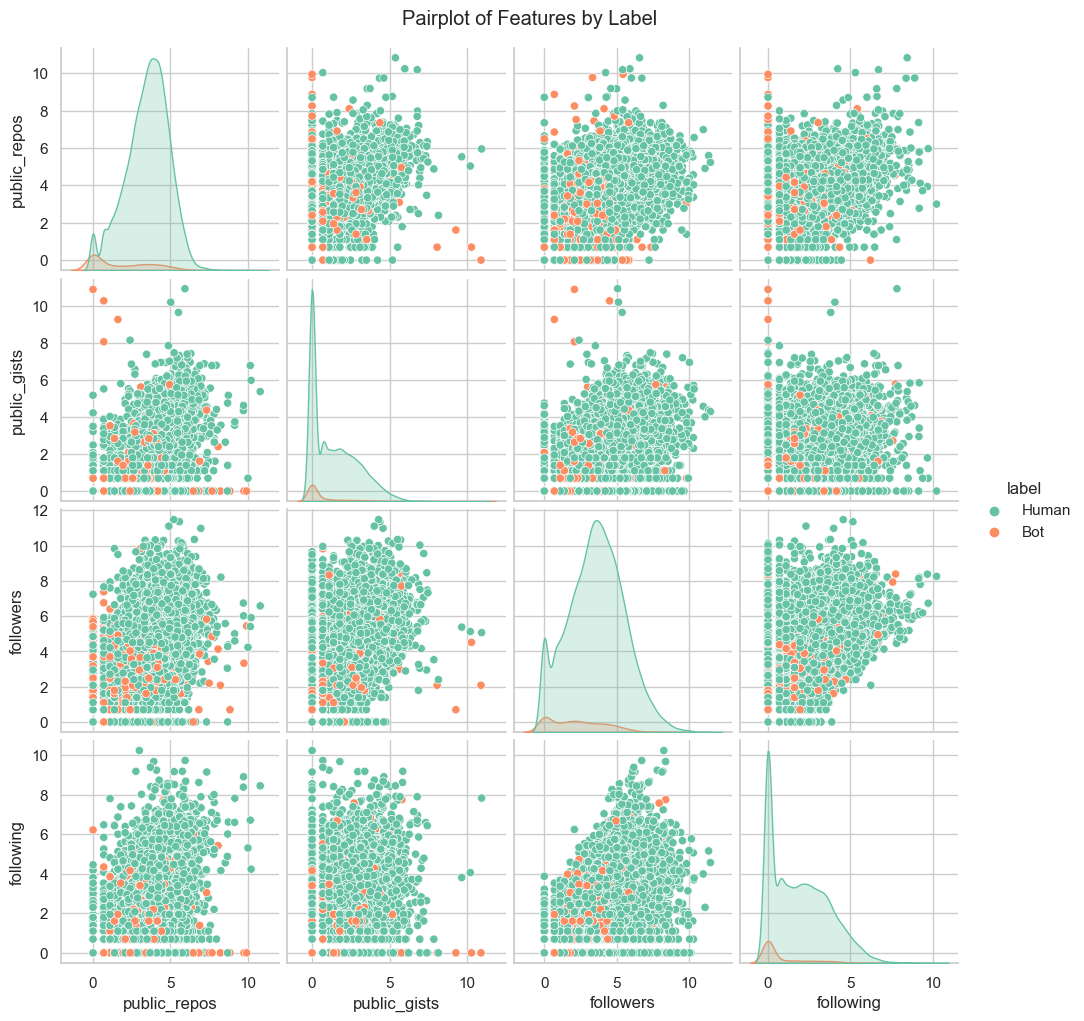

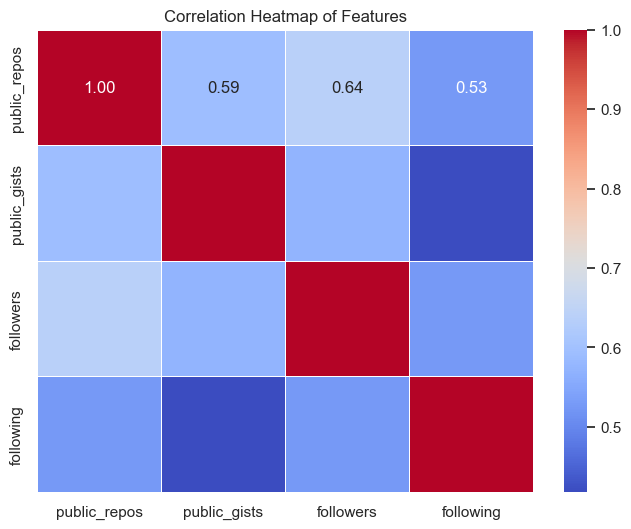

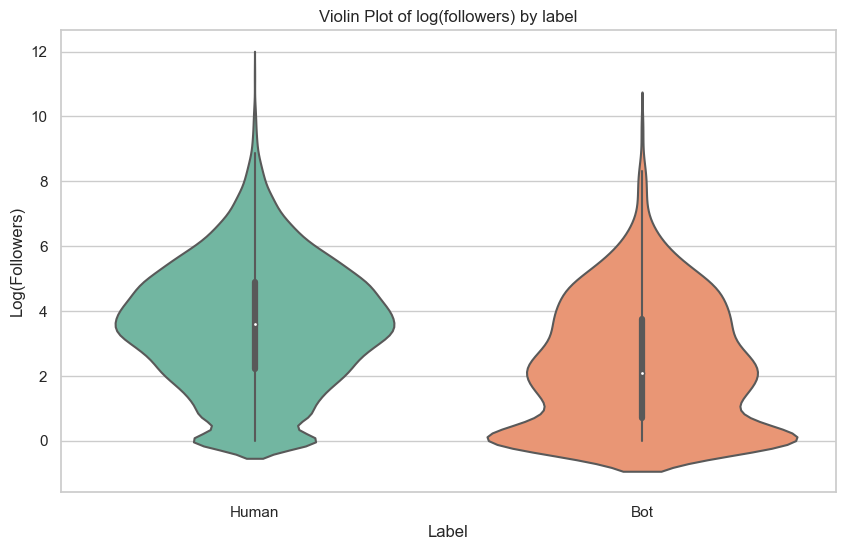

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\Homework 8第三题结果.csv')

# 处理无穷大值（如果有的话）
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# 对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for column in columns_to_transform:
    data[column] = np.log1p(data[column])

# 1. 绘制箱线图：展示不同 label 类别下 log_followers 的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='followers', data=data, palette="Set2")
plt.title('Boxplot of log(followers) by label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()

# 2. 绘制成对图：展示不同特征之间的成对关系，并根据 label 分类
sns.pairplot(data, hue="label", vars=["public_repos", "public_gists", "followers", "following"], palette="Set2")
plt.suptitle("Pairplot of Features by Label", y=1.02)  # 调整标题位置
plt.show()

# 3. 绘制热图：展示 log_public_repos, log_public_gists, log_followers, log_following 等特征之间的相关性
corr = data[["public_repos", "public_gists", "followers", "following"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# 4. 绘制小提琴图：展示 label 与 log_followers 之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='followers', data=data, palette="Set2")
plt.title('Violin Plot of log(followers) by label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()


In [5]:
import pandas as pd
from ydata_profiling import ProfileReport  # 确保正确导入 ydata_profiling

# 设置文件路径
file_path = r'C:\Users\光影PRO\Desktop\DaSE\导论\Homework 8第三题结果.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 生成交互式数据分析报告
profile = ProfileReport(df, title="GitHub Bot Processed Data Report", explorative=True)

# 保存报告为 HTML 文件
profile.to_file("github_bot_processed_data_report.html")

# 显示报告
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]